In [15]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from PIL import Image
import cv2
import os
import json

#### Leer y limpiar imagenes

In [88]:
DATASET_PATH = "data/dataset/"
IMG_WIDTH = 200
IMG_HEIGHT = 200

In [89]:
X = []
for img in os.listdir(DATASET_PATH):
    if(img.lower().endswith('.jpg')):
        img = cv2.imread(DATASET_PATH + img, 0)
        img = cv2.resize(img, (IMG_WIDTH,IMG_HEIGHT))
        X.append(img)

#### Visualize image

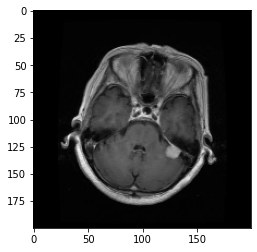

In [90]:
plt.imshow(X[0], cmap='gray')

#### Read Train JSON

In [28]:
TEST_JSON_FILE = 'data/json/test.json'
test_file = open(TEST_JSON_FILE)
test_data = json.load(test_file)

In [75]:
class TestData:
    def __init__(self, filename, size, all_points_x, all_points_y, is_tumor):
        self.filename = filename
        self.size = size
        self.all_points_x = all_points_x
        self.all_points_y = all_points_y
        self.is_tumor = is_tumor
    def __str__(self):
        return (
        f'Image {self.filename}:\n'
        f'Size: {self.size}\n'
        f'X points: {self.all_points_x}\n'
        f'Y points: {self.all_points_y}\n'
        f'Tumor?: {is_tumor}'
        )

In [77]:
Y = []
for doc_name in test_data:
    filename = test_data[doc_name]['filename']
    size = test_data[doc_name]['size']
    regions = test_data[doc_name]['regions'][0]
    regions_shape_attributes = regions['shape_attributes']
    all_points_x = regions_shape_attributes['all_points_x']
    all_points_y = regions_shape_attributes['all_points_y']
    is_tumor = True if regions['region_attributes']['shape'] == 'tumor' else False
    t = TestData(filename, size, all_points_x, all_points_y, is_tumor)
    Y.append(t)

In [91]:
print(Y[0])

Image 0.jpg:
Size: 28189
X points: [121, 113, 113, 99, 89, 94, 107, 127, 144, 156, 166, 174, 174, 169, 137, 125]
Y points: [105, 112, 122, 129, 149, 168, 184, 182, 191, 190, 180, 163, 145, 121, 104, 103]
Tumor?: True
